<a href="https://colab.research.google.com/github/dannygarcia193/IBM_Capstone_Project_Data/blob/master/IBM_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style ='text-align: center; margin-bottom:-40px;'> IBM Data Science Capstone Project Notebook <h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 10px; margin-bottom:0px;">

<font size = 3.5>

1. <a href="#item1">Introduction</a><br/>
2. <a href="#item4">Data Wrangling</a> <br/>
3. <a href="#item10">Data Analyses</a><br/>
4. <a href="#item14">Conclusions</a>

<a id='item1'></a>

<h2 style ='margin-top: -5px;' > 1. Introduction </h2>

### 1.1 Business Problem

<font size ='3'> <p style = 'text-indent: 30px;margin-bottom: 20px'> 
My cousin is in the late stages of developing his business plan for his restaraunt, Restaraunte La Tierra De Tacos (which I will be referring to as 'the company'). After careful planning and consideration, the company has chosen San Francisco (SF) as the location for their business. 
For the company, SF is a good choice given the city's relatively large population, it's vibrant urban setting, strong transportation infratructure, among other factors. However, the company is having trouble choosing the best location for their restaraunt within San Fransisco. The company considers this a vital decision as it may dictate their success (or failure). 
    
The company needs assitance in filtering out the neighborhoods that don't meet their specific requirements in order to conduct detailed location analyses into only a select list of neighborhoods in SF. So, to help find these neighborhoods, I chose the Census tracts designated to the SF county as it most closely resembles the definition of a 'neighborhood' for the company. After careful talk with the company, the following list of requirements that neighborhood must were created: 
  
    
1. Contain a population of 5,000 + (increase opportunity of traffic and visibility)
 
2. Near at least one college and surrounded by at least three other types of schools (partnerships with schools and other organizations, and to provide catering/delivery options)  
3. Rent at or below the city's average -$3,000 

4. Median income of $50,000 or more (safeguard for tough financial times) 
5. With minimal competition (mexican restaraunts) and similar venues (ie. restaraunts) nearby

It is the aim and scope of this report to identify the neighborhoods in SF that meet the aforementioned requirements. </p></font>

### 1.2 Packages Used 

In [0]:
#Data manipulation and analyses
import pandas as pd
import numpy as np

#Map visualization
import folium
from folium.plugins import MarkerCluster
from IPython.display import display
from IPython.display import HTML

#Chart visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

#Poin-in-polygon analyses
from matplotlib import path

#Clustering
from sklearn.cluster import KMeans

#to share notebook
import jovian

<IPython.core.display.Javascript object>

### 1.3 Data Sources

<font size ='3'> In order to best answer the business question -- finding the neighborhoods in SF that meet aforementioned features -- I have chosen to utilize data from the U.S. Census Bureau and Data SF. Through their several surveys, the U.S. Census Bureau provides one of the best estimates of the current U.S. population demographics at several geographic levels (city, tract, state, etc.). Similar to the Census, SF's official open data portal, Data SF,  collects and makes data
easily accessible and open to the public. So, due to both SF's and the U.S. Census Bureau agency's reliability, and accessbility of their data, as well as methods, I have decided to use their data for my analysis. I also chose to use FourSquare API data, a location data platform that provides access to detailed data about venues (ie. nearby venues, trending venues) and user's interactions with 
them (ie. rating, tips). Their data will be useful in searching for nearby venues around select SF neighborhoods. <br/><br/>
The following is a list of the data with links that direct you to the data used in this report. You can also access the files from my github account <a href="https://github.com/dannygarcia193/github-assignment">here</a>. </font>


<font size ='3'>
    
1. <b><a href="https://data.census.gov/cedsci/table?q=&g=0500000US06075.140000&hidePreview=true&table=S0601&tid=ACSST5Y2017.S0601&vintage=2017&layer=county&cid=DP04_0001E&lastDisplayedRow=59&mode=&t=&y=2017"> ACS 5 Year Estimates (2013-2017)</a></b> -- Selected Charactersitics of the Total and Native Populations in the United States (Census Table ID: 601) 
 <p style='margin-left: 40px; margin-top:5px; margin-bottom:10px;'> <u>Filters used:</u> Selected year 2017 only and all the census tracts within SF county  </p>
       
2. <b><a href="https://data.census.gov/cedsci/table?q=&g=0500000US06075.140000&hidePreview=true&table=DP04&tid=ACSDP5Y2018.DP04&vintage=2018&layer=county&cid=DP04_0001E&lastDisplayedRow=59&mode=&t=Housing&y=2018 ">ACS 5 Year Estimates (2014-2018)</a></b> -- Selected Housing Characterstics (Census Table ID: DP04) 
 <p style='margin-left: 40px; margin-top:5px;  margin-bottom:-5px;'> <u>Filters used:</u> Selected year 2018 only and all the census tracts within SF county. </p>
     
 <p style='margin-bottom:0px;'>      
3. <b><a href="https://data.sfgov.org/Economy-and-Community/Schools/tpp3-epx2">Schools </a></b>  </p>

 <p style=' margin-bottom:0px;'>    
4.  <b><a href="https://data.sfgov.org/Economy-and-Community/Colleges-in-San-Francisco-2011-/8r3f-pc6a">Colleges (2011) </a></b> </p>

 <p style=' margin-bottom:0px;'>  
5. <b><a href="https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods-2010-census-tracts-assigned/bwbp-wk3r">Analysis Neighborhoods</a></b> - 2010 Census Tracts Assigned to Neighborohoods   </p>

<a id='item4'></a>

# 2 Data Wrangling

### 2.1 SF Tracts 

In [0]:
#loading the first datset
pop =pd.read_csv(r"C:\Users\garci\Desktop\ACS_17_5YR_S0601_with_ann.csv",skiprows=1)

In [0]:
pop.shape

(197, 163)

<font size ='3'>Let's start by cleaning and retrieving only the relevant data from the SF Main dataset.</font>

In [0]:
reduce = pop.columns.to_list()
keep =[i for i in range(len(reduce)) if reduce[i].startswith('Total; Estimate')]
keep.append(2) #add geography column since it doesn't start with 'Total; Estimate'
pop = pop.iloc[:, keep] #grab all the rows but only the columns filtered in keep
      
#keep only 'Census Tract {number}' 
pop['Geo']=pop['Geography'].str.replace(', San Francisco County, California', '',regex=True)

print(pop.shape)

(197, 22)


<font size ='3'>Now we only keep the SF Tracts that meet the first two requirements: <u> >5,000 total population </u>and <u> >=50,000 median income per tract. </u></font>

In [0]:
SF = pop[pop['Total; Estimate; Total population']> 5000] 
SF=SF.astype({'Total; Estimate; Median income (dollars)':'int64'})
SF=SF[SF['Total; Estimate; Median income (dollars)'] >= 50000]
#filter_criteria =SF['Geo'].to_list() 
SF.reset_index(drop=True,inplace=True)
print(SF.shape)
SF.head(2)

(18, 22)


,Total; Estimate; Total population,Total; Estimate; AGE - Under 5 years,Total; Estimate; AGE - 5 to 17 years,Total; Estimate; AGE - 18 to 24 years,Total; Estimate; AGE - 25 to 44 years,Total; Estimate; AGE - 45 to 54 years,Total; Estimate; AGE - 55 to 64 years,Total; Estimate; AGE - 65 to 74 years,Total; Estimate; AGE - 75 years and over,Total; Estimate; Median age (years),...,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Asian,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Some other race,Total; Estimate; Median income (dollars),Geography,Geo
0,5877,5.9,6.4,6.8,46.1,12.2,9.9,6.3,6.4,36.0,...,94.5,66.5,1.7,0.0,23.7,1.9,0.7,70083,"Census Tract 154, San Francisco County, Califo...",Census Tract 154
1,5760,4.1,5.7,5.9,51.7,12.6,8.6,6.0,5.3,33.2,...,94.2,71.4,7.1,0.0,11.5,0.0,4.1,60518,"Census Tract 165, San Francisco County, Califo...",Census Tract 165


### 2.2 Schools and Colleges

<font size ='3'>For the next two datesets, we will convert each json string files into a Pandas dataframe.</font>

In [0]:
schools_geo = pd.read_json(r"C:\Users\garci\Desktop\San_Francisco\Schools.geojson")
colleges_geo = pd.read_json(r"C:\Users\garci\Desktop\San_Francisco\Colleges in San Francisco (2011).geojson")

<font size ='3'>We then create two functions. The first appends three new columns (school name and coordinates) to the existing dataset. The second one checks for null or Nan items.</font>

In [0]:
def frames (data, propertiesName):
    for i in range(len(data)): #get the locations
        data.at[i, 'School Name'] = data['features'][i]['properties'][propertiesName] 
        data.at[i,'lat'] = data['features'][i]['geometry']['coordinates'][1] #grabs the second item in the tuple (latitude)
        data.at[i,'long'] = data['features'][i]['geometry']['coordinates'][0] #grabs the first item in the tuple (longitude)
    return data

def check (data, df):
    print('Number of null items: {}'.format(data.isnull().sum()))
    print('Number of NaN items: {}'.format(data.isna().sum()))

In [0]:
schools = frames(schools_geo,'campus_name')

print('Dataframe shape before preprocessing:',schools.shape)
check(schools, schools[['School Name','lat','long']])
print('--------------------------------------------------------------------------------------')
drops1 = list(schools[schools['School Name'].duplicated()].index.values)
print('Duplicates. Indexes to drop:', drops1)

schools.drop(columns=['type','features'],index =drops1,inplace=True)
print('Dataframe shape after preprocessing: ',schools.shape)
schools.head(5)
print('--------------------------------------------------------------------------------------')

colleges_geo = pd.read_json(r"C:\Users\garci\Desktop\San_Francisco\Colleges in San Francisco (2011).geojson")


colleges = frames(colleges_geo,'institution')

print('Dataframe shape before preprocessing:',colleges.shape)
check(colleges, colleges[['School Name','lat','long']])
print('--------------------------------------------------------------------------------------')
drops2 =list(colleges[colleges['School Name'].duplicated()].index.values)
print('Duplicates. Indexes to drop:', drops2)

colleges.drop(columns=['type','features'],index =drops2, inplace=True)

colleges.reset_index(drop=True,inplace=True)
print('Dataframe shape after preprocessing: ',colleges.shape)

print('--------------------------------------------------------------------------------------')

Dataframe shape before preprocessing: (445, 5)
Number of null items: type           0
features       0
School Name    0
lat            0
long           0
dtype: int64
Number of NaN items: type           0
features       0
School Name    0
lat            0
long           0
dtype: int64
--------------------------------------------------------------------------------------
Duplicates. Indexes to drop: [83, 190, 281, 291, 297]
Dataframe shape after preprocessing:  (440, 3)
--------------------------------------------------------------------------------------
Dataframe shape before preprocessing: (46, 5)
Number of null items: type           0
features       0
School Name    0
lat            0
long           0
dtype: int64
Number of NaN items: type           0
features       0
School Name    0
lat            0
long           0
dtype: int64
--------------------------------------------------------------------------------------
Duplicates. Indexes to drop: [2, 7, 10, 11, 12, 14, 16, 17, 18, 19,

<font size ='3'>The dataframe has been cleaned and no erros, duplicates or null values have appeared.</font>

### 2.3 Select Housing Characteristics

<font size ='3'>Next up, is the housing datset.This datset contains many irrelevant columns. We will only be needing two columns.</font>

In [0]:
land= pd.read_csv(r"C:\Users\garci\Desktop\San_Francisco\ACSDP5Y2018.DP04_data_with_overlays_2019-12-20T222527.csv", skiprows=1)

print(land.shape)
col =land.columns.to_list() #save the column (574 total) names to a list 

(197, 574)


<font size ='3'>First, we filter through all the columns and retrieve only the ones that contain the keywords of interest.</font>

In [0]:
[i for i in col  if 'rent' in i.lower() or 'value' in i.lower()]

['Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate',
 'Margin of Error!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate',
 'Percent Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate',
 'Percent Margin of Error!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate',
 'Estimate!!HOUSING TENURE!!Occupied housing units!!Renter-occupied',
 'Margin of Error!!HOUSING TENURE!!Occupied housing units!!Renter-occupied',
 'Percent Estimate!!HOUSING TENURE!!Occupied housing units!!Renter-occupied',
 'Percent Margin of Error!!HOUSING TENURE!!Occupied housing units!!Renter-occupied',
 'Estimate!!HOUSING TENURE!!Occupied housing units!!Average household size of renter-occupied unit',
 'Margin of Error!!HOUSING TENURE!!Occupied housing units!!Average household size of renter-occupied unit',
 'Percent Estimate!!HOUSING TENURE!!Occupied housing units!!Average household size of renter-occupied unit',
 'Percent Margin of Error!!HOUSING TENURE!!Occ

<font size ='3'>After going through columns, we retrieve the two columns that we need, check for potential missing values and remove unecessary values.</font>

In [0]:
rent =land[['Geographic Area Name','Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)','Estimate!!VALUE!!Owner-occupied units!!Median (dollars)']]

print('Total null:', rent.isnull().sum()[0])
print('Total NaN:',rent.isna().sum()[0])
print('Dataframe shape:', rent.shape)

rent['Geographic Area Name']=rent['Geographic Area Name'].str.replace(', San Francisco County, California', '',regex=True)

rent.rename(columns = {'Geographic Area Name': 'Tract','Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)': 'Estimated Median Gross Rent','Estimate!!VALUE!!Owner-occupied units!!Median (dollars)': 'Estimated Median Values (Owner-Occupied Units)'},inplace =True)

rent.head(2)

Total null: 0
Total NaN: 0
Dataframe shape: (197, 3)


C:\Users\garci\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Tract,Estimated Median Gross Rent,Estimated Median Values (Owner-Occupied Units)
0,Census Tract 101,1686,1002000
1,Census Tract 102,2449,1142500


<font size ='3'>Now we retrieve only rows that are in the main SF datset and filter both datsets by the third requirement: <u> median rent < $3,000 </u></font>

In [0]:
rent = rent[rent['Tract'].isin(SF['Geo'])]
rent = rent[rent['Estimated Median Gross Rent'].astype(int) < 3000].reset_index(drop=True) 
SF= SF[SF['Geo'].isin(rent['Tract'])].reset_index(drop=True)
print('Shape after filtering:', rent.shape)
rent.head(2)

Shape after filtering: (16, 3)


,Tract,Estimated Median Gross Rent,Estimated Median Values (Owner-Occupied Units)
0,Census Tract 154,2267,1574000
1,Census Tract 165,1865,1215900


### 2.4 TRACT BOUNDARIES

<font size ='3'>Now, it's time to clean the last datset. </font>

In [0]:
neighborhoods = pd.read_json(r"C:\Users\garci\Desktop\Census 2010_ Tracts for San Francisco.geojson")

<font size ='3'>We start by creating a list of the selected SF tracts which we will be using to filter through the Json data. We also create another json style dictionary (variable data) to keep the multipolygon coordinates (geographic boundaries) of the selected SF tracts. </font>

In [0]:
filters = list(SF['Geo'].values)
print('The elements listed are the SF tracts to keep.\n\n', filters)
data = {'type': 'FeatureCollection','features':[]}

The elements listed are the SF tracts to keep.

 ['Census Tract 154', 'Census Tract 165', 'Census Tract 166', 'Census Tract 167', 'Census Tract 207', 'Census Tract 215', 'Census Tract 252', 'Census Tract 301.02', 'Census Tract 303.01', 'Census Tract 304', 'Census Tract 308', 'Census Tract 309', 'Census Tract 311', 'Census Tract 402', 'Census Tract 614', 'Census Tract 615']


In [0]:
for i in range(len(neighborhoods['features'])):
    if neighborhoods['features'][i]['properties']['namelsad10'] in  filters:
    #keep only the multipolygon coordinates for the selected SF Tracts
        data['features'].append(neighborhoods['features'][i]) 
print(len(data['features']), len(SF))

16 16


<font size ='3'>Next, let's retrieve the point coordinates for each selected SF tract. </font>

In [0]:
n =pd.DataFrame(neighborhoods['features'])
#retrieve the properties column which contains the lat and long of the SF tracts
n =pd.DataFrame([n['features'][i]['properties'] for i in range(len(n['features']))]) 

n.sort_values(by=['namelsad10'],inplace=True) #to compare in the following loop
n.reset_index(inplace=True,drop=True)

for a, b in zip(n['namelsad10'],pop['Geo']):
    if a !=b: print('something went wrong',a,b) #making sure we correctly retrieved the SF tracts 

print(len(pop), len(n)) 

197 197


In [0]:
#retrieve only the selected SF tracts
n =n[n['namelsad10'].isin(SF['Geo'])].reset_index(drop=True) 

# compare against the main SF dataframe
for a,b in zip(n['namelsad10'],SF['Geo']):
    if a !=b: print('something went wrong',a,b)

#add the lat and long point coordinates from the n dataframe to the SF dataframe
for x in range(len(n)):
    #we skip the first character which always starts with a '+'
    SF.at[x,'lat'] = n['intptlat10'][x][1:] 
    SF.at[x, 'long'] = n['intptlon10'][x] 

print('Shape of main SF dataset:', SF.shape)

Shape of main SF dataset: (16, 24)


In [0]:
SF.head(3)

,Total; Estimate; Total population,Total; Estimate; AGE - Under 5 years,Total; Estimate; AGE - 5 to 17 years,Total; Estimate; AGE - 18 to 24 years,Total; Estimate; AGE - 25 to 44 years,Total; Estimate; AGE - 45 to 54 years,Total; Estimate; AGE - 55 to 64 years,Total; Estimate; AGE - 65 to 74 years,Total; Estimate; AGE - 75 years and over,Total; Estimate; Median age (years),...,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Asian,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander,Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Some other race,Total; Estimate; Median income (dollars),Geography,Geo,lat,long
0,5877,5.9,6.4,6.8,46.1,12.2,9.9,6.3,6.4,36.0,...,1.7,0.0,23.7,1.9,0.7,70083,"Census Tract 154, San Francisco County, Califo...",Census Tract 154,37.7843608,-122.4510358
1,5760,4.1,5.7,5.9,51.7,12.6,8.6,6.0,5.3,33.2,...,7.1,0.0,11.5,0.0,4.1,60518,"Census Tract 165, San Francisco County, Califo...",Census Tract 165,37.7741958,-122.4477884
2,5787,2.4,2.3,5.8,61.7,9.1,11.1,5.0,2.6,32.7,...,4.0,0.5,13.4,0.3,0.6,56912,"Census Tract 166, San Francisco County, Califo...",Census Tract 166,37.7704942,-122.4474539


<font size ='3'>The next step is merging the rent and main SF dataset together.</font>

In [0]:
for a,b in zip(rent['Tract'], SF['Geo']):
    if a != b: print('Something is wrong:',a,b)#for sanity check

for x in range(len(SF)): #merge at index
    SF.at[x,'Estimated Median Gross Rent']= rent['Estimated Median Gross Rent'][x]
    SF.at[x,'Estimated Median Values (Owner-Occupied Units)'] = rent['Estimated Median Values (Owner-Occupied Units)'][x]

<font size ='3'>The last step in this cleaning process, is to do condense and change the types of some of the data.</font>

In [0]:
SF.columns # copy and paste into next cell and cut down the columns that aren't needed

Index(['Total; Estimate; Total population',
       'Total; Estimate; AGE - Under 5 years',
       'Total; Estimate; AGE - 5 to 17 years',
       'Total; Estimate; AGE - 18 to 24 years',
       'Total; Estimate; AGE - 25 to 44 years',
       'Total; Estimate; AGE - 45 to 54 years',
       'Total; Estimate; AGE - 55 to 64 years',
       'Total; Estimate; AGE - 65 to 74 years',
       'Total; Estimate; AGE - 75 years and over',
       'Total; Estimate; Median age (years)', 'Total; Estimate; SEX - Male',
       'Total; Estimate; SEX - Female',
       'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race',
       'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White',
       'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American',
       'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native',
       'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Asian',
       'T

In [0]:
#the columns to keep
SF=SF[['Geo','Total; Estimate; Total population','Estimated Median Gross Rent',  
        'Estimated Median Values (Owner-Occupied Units)', 'Total; Estimate; Median income (dollars)',
      'Total; Estimate; Median age (years)', 'Total; Estimate; SEX - Male',
       'Total; Estimate; SEX - Female', 'lat',   'long', ]]

In [0]:
#rename columns at place 
SF.columns = 'Tract','Total Pop','Estimated Median Gross Rent', \
       'Estimated Median Values (Owner-Occupied Units)', \
       'Median Income', 'Median Age', 'Total Male %', 'Total Female %', 'lat','long' 

In [0]:
SF.head(2)

,Tract,Total Pop,Estimated Median Gross Rent,Estimated Median Values (Owner-Occupied Units),Median Income,Median Age,Total Male %,Total Female %,lat,long
0,Census Tract 154,5877,2267,1574000,70083,36.0,46.0,54.0,37.7843608,-122.4510358
1,Census Tract 165,5760,1865,1215900,60518,33.2,43.8,56.2,37.7741958,-122.4477884


In [0]:
#change the types of the following columns
SF_Summary=SF.astype({'Total Pop':'int64', 'Median Income':'int64','Total Male %':'float64','Total Female %':'float64',
                      'Median Age':'float64', 'Estimated Median Gross Rent': 'int64',
                      'Estimated Median Values (Owner-Occupied Units)': 'int64'})

In [0]:
SF_Summary.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
Tract                                             16 non-null object
Total Pop                                         16 non-null int64
Estimated Median Gross Rent                       16 non-null int64
Estimated Median Values (Owner-Occupied Units)    16 non-null int64
Median Income                                     16 non-null int64
Median Age                                        16 non-null float64
Total Male %                                      16 non-null float64
Total Female %                                    16 non-null float64
lat                                               16 non-null object
long                                              16 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 1.4+ KB


<font size ='3'>The data is now clean and formatted!</font>

### 2.5 Foursquare API Call 

<font size='3'>To retrieve the nearby venues using the Forusquare API we'll first need to save our credential into variables.</font> 

In [0]:
#CREDENTIALS (PERSONAL SO REMOVED

<font size='3'>Next we define our parameters (click <a href='https://developer.foursquare.com/docs/api/venues/explore'> here </a>for more info) and create function to retrieve the nearby venues for eac tract.</font>

In [0]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

venues= getNearbyVenues(names=SF['Tract'], latitudes=SF['lat'],longitudes=SF['long'])
print('Venues successfully retrieved!')

Venues successfully retrieved!


<font size ='3'>After retrieving the venues, we now need to clean the venues dataframe.</font>

In [0]:
print(venues.shape)
venues.head(2)

(764, 8)


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Census Tract 154,37.784361,-122.451036,Bryan's Market,37.786517,-122.450937,Gourmet Shop
1,1,Census Tract 154,37.784361,-122.451036,Tofino Wines,37.782784,-122.449039,Wine Bar


In [0]:
#set up to filter by these criteria. So, tuples can't contain the same coordinates as well as venue name. 
dr = [(a,b,c) for a,b,c in zip(venues['Venue Longitude'], venues['Venue Latitude'], venues['Venue'])]
print(len(dr),len(venues))
print('Example of an element in dr:',dr[0])

764 764
Example of an element in dr: (-122.45093717321892, 37.7865165121848, "Bryan's Market")


In [0]:
#Create a dictionary that counts the number of times that a tuple appears 
count_map={}
for i in dr: count_map[i] =count_map.get(i,0)+1
print(len(count_map),"\n", "Example:",list(count_map)[0:2])

keys =list(count_map.keys()) 

711 
 Example: [(-122.45093717321892, 37.7865165121848, "Bryan's Market"), (-122.44903868903226, 37.78278387882597, 'Tofino Wines')]


<font size ='3'> We now need to match the venues with their corresponding venues. Note that the venues' coordinate points will have to lie within a boundary of a selected SF tracts thus any that don't will be filtered out. This will reduce redundancy in the data and also be useful for our analysis in the next section. </font>

In [0]:
new= [] 
for x in range(len(data['features'])):
    poly = data['features'][x]['geometry']['coordinates']
    p =path.Path(poly[0][0]) #the multipolygon (two dimensional)
    for i in range(len(keys)):
#grab the first two items as lists of each tuple to assess if it's within the select polygon 
        if p.contains_point(list(keys[i][0:2])) ==True: 
            tract =data['features'][x]['properties']['namelsad10'] 
            new.append((tract, keys[i]))#add tract name with corresponding venue name and coordinates of venues(lat and long)
len(new)  

454

<font size ='3'>Lastly, we create a new dataframe from the list filter that we created.</font>

In [0]:
for i in range(len(new)):   
    if i==0: VENUES = venues[(venues['Neighborhood']==new[0][0]) & (venues['Venue'] ==new[0][1][2])]
    else: VENUES = VENUES.append(venues[(venues['Neighborhood']==new[i][0]) & (venues['Venue'] ==new[i][1][2])], ignore_index=True)

In [0]:
#drop any left over duplicate value(s)
i = list(VENUES[VENUES.duplicated()].index)
VENUES.drop(VENUES.index[i],inplace=True)
print(len(VENUES))

454


In [0]:
VENUES.drop(columns='Unnamed: 0',inplace=True)
VENUES.reset_index(drop=True)
VENUES.head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Census Tract 165,37.774196,-122.447788,"Home Service Market aka ""George's""",37.774063,-122.445976,Convenience Store
1,Census Tract 165,37.774196,-122.447788,Soothe,37.773662,-122.447404,Massage Studio


<font size='3'>Lastly we print out how many items were deleted from the venues dataset.</font>

In [0]:
print('There are {} uniques categories.'.format(len(VENUES['Venue Category'].unique())))

print('Percentage of rows kept: {:.2%}'.format(len(VENUES)/len(dr)))
print('Dataframe rows before preprocessing: {} \n Dataframe rows after preprocessing: {}'.format(len(dr),VENUES.shape[0]))

There are 155 uniques categories.
Percentage of rows kept: 59.42%
Dataframe rows before preprocessing: 764 
 Dataframe rows after preprocessing: 454


<font size ='3'>We did a lot here. We first started by cleaning the main SF datset and filtered out the tracts that didn't meet first two requirements. This left us with 18 out of the original 197 SF tracts. We then proceeded to convert the schools' and colleges' json files into a dataframe and took care of the duplicates values that they had. From there, we retrieved two select columns from the massive rent dataset and kept the tracts that met third business requirement. We were then left with 16 tracts. As for the SF geographic boundary datset, we created two datsets one with point coordinates and the other with the boundary coordinates for each of the selected tracts. Lastly, we retrieved and cleaned the Foursquare data that consisted of nearby venues around the selcted SF tracts. We made sure that the data was clean and within a boundary of one of the slected SF tracts. </font>

<a id='item10'></a>

## 3. Data Analyses 

### 3.1 Initial Neighborhood Visualization

<font size ='3'>For the first visualization we want to visualize the locations of the selected SF tracts. First we create two functions that will allow us to create a choropleth map and either map markers orccluster markers. </font>

In [0]:
def choropleth_map(map_name,geo_data,DF,layer_name, columns,color,fill,line,legend_name):
    return map_name.choropleth(geo_data=geo_data,
           data=DF,  name=layer_name, columns=columns, key_on='feature.properties.namelsad10',
           fill_color=color, fill_opacity=fill, line_opacity=line,legend_name= legend_name )

In [0]:
def f(data,iconName,firstColumn,info, tooltip,color,icon,mc =False):
    feature_group = folium.FeatureGroup(name =iconName)
    if mc ==True:
        mc =MarkerCluster(name =iconName)
        for note, lat,long in zip(data[firstColumn],data['lat'],data['long']):
            mc.add_child(folium.Marker([lat,long],popup=note, tooltip= 'Click for More Info', icon=folium.Icon(color =color,icon=icon,prefix ='fa')))
        return mc
    else: 
        for note, lat,long,tool in zip(data[firstColumn],data['lat'],data['long'],data[tooltip]):#make sure to fix the lat long, get the appropiate location!!lol
            folium.Marker([lat,long],popup='{} {}'.format(info,tool), tooltip= note, icon=folium.Icon(color =color,icon=icon,prefix ='fa')).add_to(feature_group)
        return feature_group

 <font size ='3'>For the first visualization let's create a choropleth map with the total population as the layer. In addition, let's add popups showing the median income along with the respective tract that it refers to. We do this by using the folium library in Python. The Folium library allows for creation of interactive leaflet map using coordinate data. </font>

In [0]:
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
choropleth = choropleth_map(sf_map,data,SF_Summary,'Population Layer',['Tract','Total Pop'],'YlOrRd',.75,.45,'Population Per Neighborhood')

feature_group = f(SF_Summary, 'Neighborhood', 'Tract','Median Income:','Median Income','darkblue','map-marker')
feature_group.add_to(sf_map)

folium.LayerControl(collapsed=True).add_to(sf_map)
sf_map

<font size ='3'>Looking at the map, you can see that most of the districts that meet the first three criterias 
form clusters that are roughly located around the center and upper east side of SF. </font>

### 3.2 Venue Analyses

<font size ='3'> To get a better understanding of the venues data, let's group the 
data by neighborhood to visualize the nearby venues count for each tract.</font>

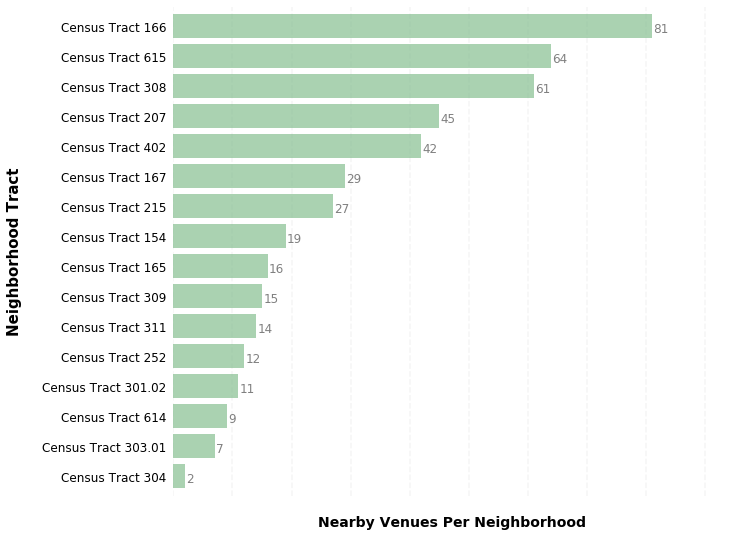

In [0]:
plot1 =VENUES.groupby('Neighborhood')[['Neighborhood','Venue']].count().sort_values(by='Venue')
ax = plot1.plot(kind='barh',figsize=(10,9),color ='#86bf91',zorder=2,width=0.8,alpha=.7,fontsize=12)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlabel('Nearby Venues Per Neighborhood',labelpad=20,weight='bold',size=14)
ax.set_ylabel('Neighborhood Tract',labelpad=20,weight='bold',size=15)

vals=ax.get_xticks()
ax.get_legend().remove()
for tick in vals: ax.axvline(x=tick,linestyle='dashed',alpha=0.6,color='#eeeeee',zorder=1)

ax.tick_params(top=False, bottom=False, left=False,right=False, labelleft=True, labelbottom=False)
for i in range(len(plot1)):
    ax.text(ax.patches[i].get_width()+.2,ax.patches[i].get_y()+.2,str(ax.patches[i].get_width()) \
          , fontsize=12,color='grey')
plt.savefig('first1.png',bbox_inches='tight')

<font size ='3'>As the chart shows, only a few of the neighborhoods that matched the comapany's first three criterias had close to 81 nearby venues with roughly half of the tracts having a nearby venue count that is less than 19. </font>

<font size ='3'>For my next graph, given the large count of unique venue categories (155 total), let's visualize the 10 most common venue category from the census tracts. </font>

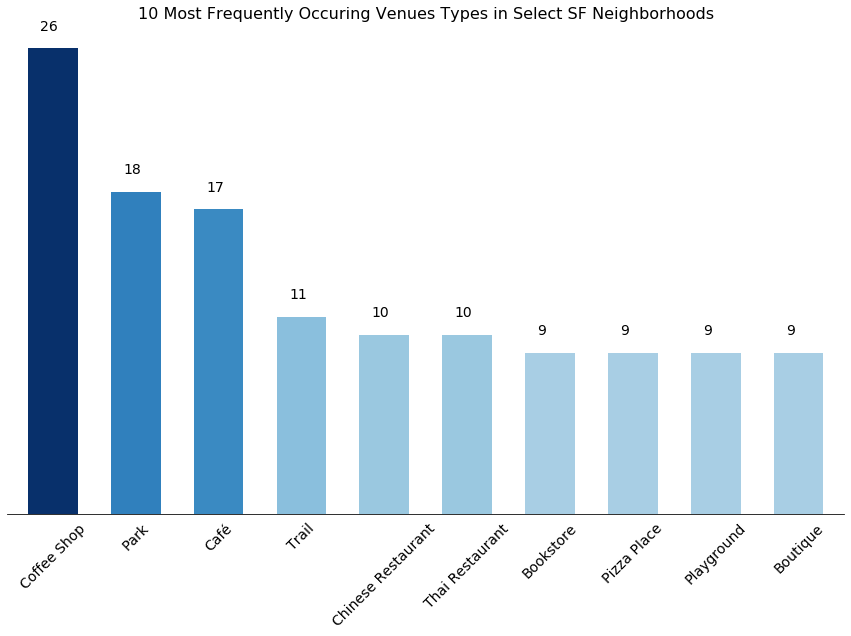

In [0]:
plot2 = VENUES.groupby('Venue Category')[['Venue']].count().sort_values(by='Venue',ascending=False).head(10)

norm = plt.Normalize(0,plot2['Venue'].values.max())
colors=plt.cm.Blues(norm(plot2['Venue'].values))
ax2 = plot2['Venue'].plot(kind='bar',figsize=(15,9),zorder=2,width=0.6,rot=45,color=colors,fontsize=14)
ax2.set_xlabel('')
ax2.set_title('10 Most Frequently Occuring Venues Types in Select SF Neighborhoods',fontsize=16)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(top=False, bottom=False, left=False,right=False, labelleft=False, labelbottom=True)

for p in ax2.patches:
    b=p.get_bbox()
    val = '{}'.format(int(b.y1))
    ax2.annotate(val,((b.x0+b.x1-.3)/2, b.y1+1),fontsize=14)
plt.savefig('2nd.png',bbox_inches='tight')

<font size ='3'>As the figure shows, coffee shops (in combination with the Cafe venue) were by far
the most frequently occuring venues. Parks were also quite common. The amount of 
parks and trails were not too suprising given that around three of the tracts were nearby 
or at a rural area (see map above). The coffee shops did however come at a suprise, 
it seems like the residents in these tracts love their cup of coffee. </font>

### 3.3 Venue Category - One-hot Encoding

<font size ='3'>In order to segment the tracts according to their venue categories, we create another dataframe 
by applying  the one-hot encoding technique for the venue categories. </font>

In [0]:
# Let's create dummy columns (with values of 0 for absent)
venue_onehot = pd.get_dummies(VENUES[['Venue Category']], prefix="", prefix_sep="")

# Add the neighborhood column to the venue_onehot datframe
venue_onehot['Neighborhood'] = VENUES['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns= [venue_onehot.columns[int(venue_onehot.columns.get_loc('Neighborhood'))]]+ \
                   [venue_onehot.columns[i] for i in range(len(venue_onehot.columns)) \
                if i != int(venue_onehot.columns.get_loc('Neighborhood'))]
venue_onehot = venue_onehot[fixed_columns]

#Lastly create a dataframe with grouped by the mean of each venue category per SF tract
sf_grouped = venue_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped.head(3)

,Neighborhood,Accessories Store,Adult Boutique,Alternative Healer,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Toy / Game Store,Trail,Tunnel,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Census Tract 154,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.052632,0.000000,0.0000,0.000000,0.052632,0.0,0.000000,0.0000
1,Census Tract 165,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0625,0.000000,0.000000,0.0,0.000000,0.0625
2,Census Tract 166,0.024691,0.0,0.0,0.012346,0.0,0.0,0.012346,0.012346,0.0,...,0.0,0.0,0.000000,0.012346,0.0000,0.012346,0.000000,0.0,0.012346,0.0000


<font size ='3'>Next we get the top 10 most common venues for each SF tract. Note that the code below and above was borrowed from the IBM Capstone example.</font>

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)


neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Census Tract 154,Coffee Shop,Cosmetics Shop,Bakery,Café,Recreation Center,Breakfast Spot,Bookstore,Kids Store,Supermarket,Bed & Breakfast
1,Census Tract 165,Café,Coffee Shop,French Restaurant,Convenience Store,Deli / Bodega,Dog Run,Eastern European Restaurant,Massage Studio,Pizza Place,Liquor Store
2,Census Tract 166,Boutique,Clothing Store,Thrift / Vintage Store,Coffee Shop,Bookstore,Board Shop,Shoe Store,Thai Restaurant,Accessories Store,Taco Place
3,Census Tract 167,Coffee Shop,Park,Yoga Studio,Salon / Barbershop,Burrito Place,Record Shop,Café,Playground,Pizza Place,Pet Store
4,Census Tract 207,Coffee Shop,Bakery,Pizza Place,Gift Shop,Boutique,Deli / Bodega,Ice Cream Shop,Bookstore,Clothing Store,Park


<font size ='3'>To answer the fourth question, let's segment the tracts. This will allow us to select the cluster that contains roughly the same type of venues as the company (food-related venues). From there, we can select the tracts that contain the least competition for the company which in this case, will be
Mexican food venues. </font>

### 3.4 K-Means Clustering

<font size ='3'>Let's start by segmenting the tracts based on their venue categories by using
the K-Means clustering algorithm from the scikit-learn library. Since there are only 16 tracts, 
I chose 3 as the clusters that I wanted to create. </font>

In [0]:
kclusters= 2
temp = sf_grouped.drop('Neighborhood',1)# to be able to cluster only the venue categories
#run Kmeans with different centorid seeds and select the best n-starting point
kmeans= KMeans(n_init = 50,n_clusters=kclusters, random_state=0).fit(temp)

print(len(kmeans.labels_))
print(kmeans.labels_)

#insert the resulting cluster labels to the datframe containing the top 10 most commmon venues.
neighborhoods_venues_sorted.insert(0,'ClusterLabels',kmeans.labels_)

16
[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]


<font size ='3'>Let's visualize the resulting clusters. To do that we first retrieve the columns containing the 
census tracts for each cluster. We then create a column with the index poisitions as the dataframe
did not reset it. We finish it off by grabbing the respective coordinates for each cluster. </font>

In [0]:
CL0 =neighborhoods_venues_sorted[neighborhoods_venues_sorted['ClusterLabels'] == 0]
CL1 =neighborhoods_venues_sorted[neighborhoods_venues_sorted['ClusterLabels'] == 1]

i1 = CL0.index.to_list()
i2 = CL1.index.to_list()

for i in i1: CL0.at[i, 'lat']= SF_Summary[SF_Summary['Tract'].isin(CL0['Neighborhood'])]['lat'][i]
for i in i1: CL0.at[i, 'long']= SF_Summary[SF_Summary['Tract'].isin(CL0['Neighborhood'])]['long'][i]

for i in i2: CL1.at[i, 'lat']= SF_Summary[SF_Summary['Tract'].isin(CL1['Neighborhood'])]['lat'][i]
for i in i2: CL1.at[i, 'long']= SF_Summary[SF_Summary['Tract'].isin(CL1['Neighborhood'])]['long'][i]
  

C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<font size ='3'>Now let's map the clusters!</font>

In [0]:
def circleMarkers(name, lat, lon, tract, label, color, fill): 
    fg = folium.FeatureGroup(name =name)
    for lat, lon, tract, cluster in zip(lat, lon, tract, label):
        label = folium.Popup(str(tract) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker( [lat, lon], radius=9,popup=label, color=color,
        fill=True,  fill_color=fill, fill_opacity=0.6).add_to(fg)
    return fg

In [0]:
map_clusters = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
FG0=circleMarkers('Cluster 0', CL0['lat'],CL0['long'],CL0['Neighborhood'],CL0['ClusterLabels'], 'blue', 'blue')
FG0.add_to(map_clusters)

FG1= circleMarkers('Cluster 1',CL1['lat'],CL1['long'],CL1['Neighborhood']  ,CL1['ClusterLabels'], 'red', 'red')
FG1.add_to(map_clusters)

folium.LayerControl().add_to(map_clusters)
map_clusters

<font size='3'>It's interesting to see how the tracts are scttered around the mid-center of SF. In addition, most of the tracts in cluster 1 are closer to the busiest parts of SF located in the upper-eastside of the city. <font>

<font size ='3'> Now let's see the two clusters that were created.</font>

In [0]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['ClusterLabels'] == 0, neighborhoods_venues_sorted.columns[[1] + list(range(2, neighborhoods_venues_sorted.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Census Tract 154,Coffee Shop,Cosmetics Shop,Bakery,Café,Recreation Center,Breakfast Spot,Bookstore,Kids Store,Supermarket,Bed & Breakfast
1,Census Tract 165,Café,Coffee Shop,French Restaurant,Convenience Store,Deli / Bodega,Dog Run,Eastern European Restaurant,Massage Studio,Pizza Place,Liquor Store
2,Census Tract 166,Boutique,Clothing Store,Thrift / Vintage Store,Coffee Shop,Bookstore,Board Shop,Shoe Store,Thai Restaurant,Accessories Store,Taco Place
3,Census Tract 167,Coffee Shop,Park,Yoga Studio,Salon / Barbershop,Burrito Place,Record Shop,Café,Playground,Pizza Place,Pet Store
4,Census Tract 207,Coffee Shop,Bakery,Pizza Place,Gift Shop,Boutique,Deli / Bodega,Ice Cream Shop,Bookstore,Clothing Store,Park
5,Census Tract 215,Coffee Shop,Breakfast Spot,Café,Chinese Restaurant,Hunan Restaurant,Portuguese Restaurant,Playground,Pizza Place,Pet Store,Convenience Store
6,Census Tract 252,Park,Clothing Store,Playground,Grocery Store,American Restaurant,Mexican Restaurant,Bus Line,Bus Station,Deli / Bodega,Bus Stop
10,Census Tract 308,Chinese Restaurant,Coffee Shop,Park,Italian Restaurant,Pizza Place,Mexican Restaurant,Burger Joint,Sushi Restaurant,Indian Restaurant,Gym / Fitness Center
11,Census Tract 309,Light Rail Station,Playground,Park,Dessert Shop,Fried Chicken Joint,Convenience Store,Massage Studio,Pool Hall,American Restaurant,Comic Shop
12,Census Tract 311,Spa,Food Truck,Convenience Store,Bar,Deli / Bodega,Café,Trail,Tennis Court,Vietnamese Restaurant,Grocery Store


In [0]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['ClusterLabels'] == 1, neighborhoods_venues_sorted.columns[[1] + list(range(2, neighborhoods_venues_sorted.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Census Tract 301.02,Trail,Park,Salad Place,Mountain,Cafeteria,Yoga Studio,Donut Shop,Dog Run,Dive Bar,Diner
8,Census Tract 303.01,Trail,Dance Studio,Park,Public Art,Bus Stop,Dessert Shop,Dumpling Restaurant,Donut Shop,Dog Run,Dive Bar
9,Census Tract 304,Wine Shop,Park,Yoga Studio,Dessert Shop,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Dive Bar,Diner


<font size ='3'>From looking at the results, the cluster labeled as 1 seems to contain outdoor venues as their top 5  most common venue category (park,trails, and mountain). This is followed by dessert-related venues (donut shops and dumpling restaraunts). On the other hand, cluster label 0 is dominated by coffee shops and restraunts as their most common venues. However, there are some tracts in cluster 1 with some outdoor venues. This makes sense though, as those tracts are very near the other tracts in cluster 0 which as stated previously, is characterized by it's outdoor venues. Despite this, I have chosen cluster 0 as the cluster of focus, as most of the top venues are similar to the company's business type (food service). </font>

<font size ='3'>However, now we need to filter out from the tracts from cluster 0 that contain at least one Mexican-food related venue which are the following: 166, 167, 252 , 308. Since the company requires the least competition, it seems fair to drop these tracts since their most common venues include a Mexican-related food venue. </font>

In [0]:
CL0=CL0[~CL0['Neighborhood'].isin(['Census Tract 166','Census Tract 167','Census Tract 252', 'Census Tract 308'])]

### 3.5 Visualizing and Examining the Clusters

<font size ='3'>To be able to answer the last requirement let's visualize the remaining tracts along with the schools and colleges on the folium map <font>

In [0]:
map_clusters2 = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
FG0=circleMarkers('Cluster 0', CL0['lat'],CL0['long'],CL0['Neighborhood'],CL0['ClusterLabels'],'blue','blue')
FG0.add_to(map_clusters2)

feature_group2 = f(schools,'Schools','School Name','', 'School Name','lightblue','book',mc =True)
feature_group2.add_to(map_clusters2)

feature_group3 = f(colleges,'Colleges','School Name','','School Name','blue','university')
feature_group3.add_to(map_clusters2)

folium.LayerControl().add_to(map_clusters2)
map_clusters2

<font size='3'>After a quick analyses, we can observe that tracts 402 and 311 didn't meet the last requirement. </font>

In [0]:
CL0=CL0[~CL0['Neighborhood'].isin(['Census Tract 402', 'Census Tract 311'])]

In [0]:
SF =SF_Summary[SF_Summary['Tract'].isin(CL0['Neighborhood'])].sort_values('Median Income',ascending=False)

In [0]:
SF.head()

,Tract,Total Pop,Estimated Median Gross Rent,Estimated Median Values (Owner-Occupied Units),Median Income,Median Age,Total Male %,Total Female %,lat,long
15,Census Tract 615,13864,2714,1042500,103451,37.0,52.9,47.1,37.7877258,-122.3923886
4,Census Tract 207,5011,1990,1509400,90625,35.0,50.6,49.4,37.7591680,-122.4235588
5,Census Tract 215,5155,2363,1364800,82591,38.0,52.2,47.8,37.7450512,-122.4267050
11,Census Tract 309,6942,2796,1334100,73990,47.1,50.5,49.5,37.7283108,-122.4682602
0,Census Tract 154,5877,2267,1574000,70083,36.0,46.0,54.0,37.7843608,-122.4510358


In [0]:
SF.describe(include='all').round(2)

,Tract,Total Pop,Estimated Median Gross Rent,Estimated Median Values (Owner-Occupied Units),Median Income,Median Age,Total Male %,Total Female %,lat,long
count,7,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7,7
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7
top,Census Tract 215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.7550917,-122.4682602
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
mean,NaN,6961.86,2229.86,1299971.43,77701.71,37.39,49.30,50.70,NaN,NaN
std,NaN,3110.04,436.64,206437.27,15532.10,4.55,3.31,3.31,NaN,NaN
min,NaN,5011.00,1614.00,1042500.00,60518.00,33.20,43.80,47.10,NaN,NaN
25%,NaN,5457.50,1927.50,1137500.00,66368.50,35.20,47.55,48.60,NaN,NaN
50%,NaN,5877.00,2267.00,1334100.00,73990.00,36.00,50.50,49.50,NaN,NaN
75%,NaN,6533.00,2538.50,1437100.00,86608.00,37.50,51.40,52.45,NaN,NaN


<a id='item14'></a>

## 4 Conclusions

### 4.1 Results and Discussion

 <p style = 'text-indent: 30px;margin-bottom: 20px'><font size='3'>    
  Our analysis shows that our selected tracts venue categories are characterized by coffee shops, outdoor venues such as parks, and asian restaraunts. This makes sense since most of the tracts that these venues belong too are located in areas near several colleges and are centered around parks or trails. We can also assume that these neighborhoods have a relatively large Asian population given the popularity of Asian restaraunts observed. In regards to their spatial location in SF, the tracts observed seems to be scattered around the mid-center of the city.</font></p>
 <p style = 'text-indent: 30px;margin-bottom: 20px'><font size='3'>
     After digging further into the selected tracts, we found seven tracts/neighborhood candidates for the business to choose from. These tracts were found to be affluent with a median income mean of 77,701 dollars, and an average gross rent of 2,229 dollars. In particular, tract 615 stood out with their population size nearly doubling the others (13,864), relatively high median income (&dollar;103,451), and proximity to several colleges. Special consideration should be given to this tract.</font></p>
 <p style = 'text-indent: 30px;margin-bottom: 20px'><font size='3'>
     It should be noted, that these results provide only a direction at which the company can conduct further and more detailed anaylsis of the suggested neighborhood locations. Given the methods used in finding the answer to the business question, I can only conclude that the candidate tracts are potential good locations for the company to look futher into as the requirements outlined in the introduction of this report. Despite the limitations mentioned, this report is still useful for the company as it condenses the number of locations that they have to anaylze. </font></p>

### 4.2 Conclusion and Final Remarks

  <p style = 'text-indent: 30px;margin-bottom: 20px'><font size='3'>
 Restaraunte Los Tacos Del Mar had trouble finding a good location within SF to start their business given the size of SF and large quantity of neighborhoods. In order to find a location that aligns with their busiiness strategy, they came up with five requirements that a neighborhood needed to have: a median income of more than 50,000 dollars, a total population of at least 5,000 people, the median rent less than 3,000 dollars, have nearby venues that are similar in terms of their business type but  contain the least amount of competition, and lastly, be nearby at least one college and five other types of schools. With the requirements in place, I retrieved relevant data from the U.S. Census, Data SF, and FourSquare's API with the aims of finding tracts that met the requirements set out by the company. Several cleaning steps were needed after retrieving the data. After some filtering of the data,the original 197 tracts in SF were condensed to 18 that met the first three requirements previously metioned. </font></p>
  <p style = 'text-indent: 30px;margin-bottom: 20px'><font size='3'>
        To filter by the last two requirements, I used the K-Means clustering technique and selected cluster 0 as the best representative of the company's business type. In order to fulfill the fourth requirement (see intro for reference), I looked through the dataframe and was able to filter out four tracts that contained Mexican restaraunts as one of their common venue categories. The remaining tracts were then mapped along with the schools and colleges in order to select the ones that met the last requirement (see intro for reference). The seven tracts that met the last requirement were then shown to the company as potential tracts for the business to look further into. This report proved to be beneficial as the company was able to conduct detailed analyses into the resulting nine tracts and ultimately, find the best tract to settle their business in. </font></p>